# Kidney disease detection model

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import required libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Setting the path

In [ ]:
# Set the file path of your dataset inside Google Drive
file_path = '/content/drive/MyDrive/kidney_disease.csv'

# Load dataset from the mounted Drive path
df = pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')

# Explore dataset

In [ ]:
# Explore dataset
print("First 5 rows:\n", df.head())
print("\nData info:\n")
print(df.info())
print("\nMissing values count:\n", df.isnull().sum())

First 5 rows:
    id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

Data info:

<class 'pandas.core.frame.DataFrame'>
Rang

# Data Cleaning and Preprocessing

In [ ]:
# Replace '?' with NaN if present
df.replace('?', np.nan, inplace=True)

# Drop 'id' column as it is not useful for modeling
# df.drop('id', axis=1, inplace=True)

# Separate columns by type from info and missing data observation
numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
object_numeric_cols = ['pcv', 'wc', 'rc']  # Object columns but numeric data
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# For object-numeric columns, fill missing with mode, then convert to numeric
for col in object_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = pd.to_numeric(df[col], errors='coerce')

# For categorical columns, fill missing with mode and label encode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = LabelEncoder().fit_transform(df[col])

# 'classification' column: strip, lower, and encode target (ckd=1, notckd=0)
df['classification'] = df['classification'].str.strip().str.lower()
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

# After cleaning, check for any remaining missing values
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               1
wc                1
rc                1
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


# spliting the dataset and Training the model

In [ ]:
# Prepare features and target
X = df.drop(['classification', 'id'], axis=1)
y = df['classification'].apply(lambda x: 1 if x == 1 else 0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Prediction

Accuracy: 100.00%

Prediction: Chronic Kidney Disease DETECTED
Risk Probability : 0.7500
Risk Percentage : 75.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
 [[28  0]
 [ 0 52]]


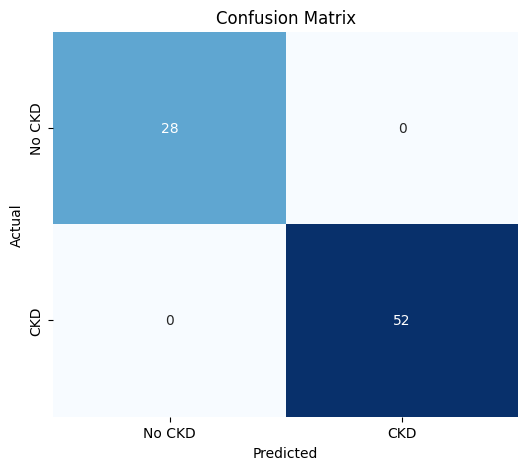

/tmp/ipython-input-3806031472.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')


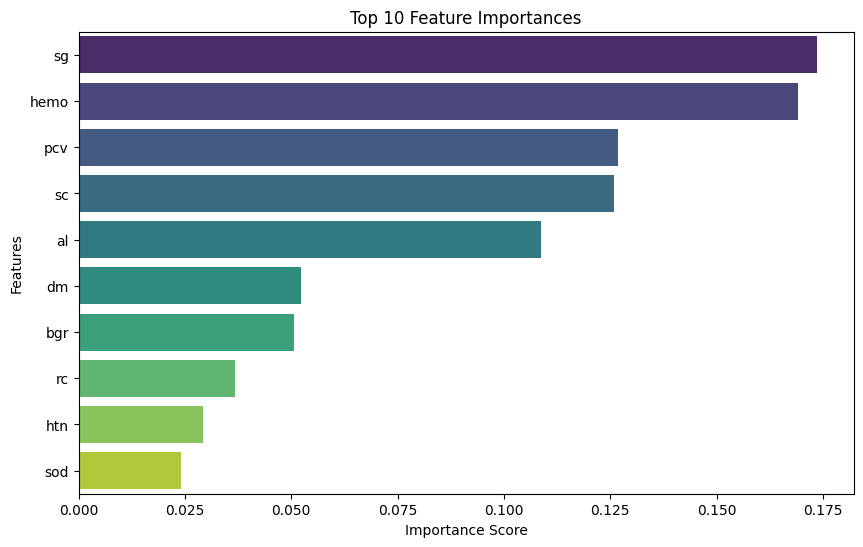

Top contributing factors for prediction: sg (0.17), hemo (0.17), pcv (0.13), sc (0.13), al (0.11)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Predicting on one sample with risk probabilities and risk percentage
sample_idx = 0
sample = X_test[sample_idx].reshape(1, -1)
pred = clf.predict(sample)[0]
probs = clf.predict_proba(sample)[0]

if pred == 1:
    print("\nPrediction: Chronic Kidney Disease DETECTED")
    print(f"Risk Probability : {probs[1]:.4f}")         # Probability between 0 and 1
    print(f"Risk Percentage : {probs[1]*100:.2f}%")         # Percentage format
else:
    print("\nPrediction: No Chronic Kidney Disease Detected")
    print(f"Risk Probability of disease (0-1): {probs[1]:.4f}")
    print(f"Risk Percentage of disease : {probs[1]*100:.2f}%")
    print(f"Low Risk Probability (no disease, 0-1): {probs[0]:.4f}")
    print(f"Low Risk Percentage (no disease): {probs[0]*100:.2f}%")

# Now classification report and confusion matrix as before
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Bar Plot
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]  # Sort descending

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Feature Importance Summary Text
top_features = sorted(zip(importances, features), reverse=True)[:5]
summary = "Top contributing factors for prediction: "
summary += ", ".join([f"{name} ({importance:.2f})" for importance, name in top_features])
print(summary)


# Prediction function by patient ID

In [ ]:
def predict_patient_by_id(df, patient_id, scaler, model):
    # Select patient data by ID (drop classification and id columns)
    patient_data = df[df['id'] == patient_id].drop(['classification', 'id'], axis=1)
    if patient_data.empty:
        print("Patient ID not found!")
        return
    # Scale features
    patient_array = scaler.transform(patient_data.values)

    # Make prediction and get probabilities
    pred = model.predict(patient_array)[0]
    probs = model.predict_proba(patient_array)[0]

    # Print results with risk probability in 0-1 format and percentage
    if pred == 1:
        print(f"Prediction for Patient ID {patient_id}: Chronic Kidney Disease DETECTED")
        print(f"Risk Probability : {probs[1]:.4f}")
        print(f"Risk Percentage: {probs[1]*100:.2f}%")
    else:
        print(f"Prediction for Patient ID {patient_id}: No Chronic Kidney Disease Detected")
        print(f"Risk Probability of disease : {probs[1]:.4f}")
        print(f"Risk Percentage of disease: {probs[1]*100:.2f}%")
        print(f"Low Risk Probability (no disease): {probs[0]:.4f}")
        print(f"Low Risk Percentage (no disease): {probs[0]*100:.2f}%")


# Test for patient with id = 10


In [ ]:
predict_patient_by_id(df, 10 , scaler, clf)

Prediction for Patient ID 10: Chronic Kidney Disease DETECTED
Risk Probability : 1.0000
Risk Percentage: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Test for patient with id = 256

In [ ]:
predict_patient_by_id(df, 256 , scaler, clf)

Prediction for Patient ID 256: No Chronic Kidney Disease Detected
Risk Probability of disease : 0.0200
Risk Percentage of disease: 2.00%
Low Risk Probability (no disease): 0.9800
Low Risk Percentage (no disease): 98.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Test for patient with id = 405

In [ ]:
predict_patient_by_id(df, 405 , scaler, clf)

Patient ID not found!
